# STEP #0: PROBLEM STATEMENT

Data represents weekly 2018 retail scan data for National retail volume (units) and price.
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

## STEP 1 Importing Stuff

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from prophet import Prophet

In [5]:
df=pd.read_csv("avocado.csv")

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

## STEP 2 EDA

In [10]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df=df.sort_values(by='Date')

In [12]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


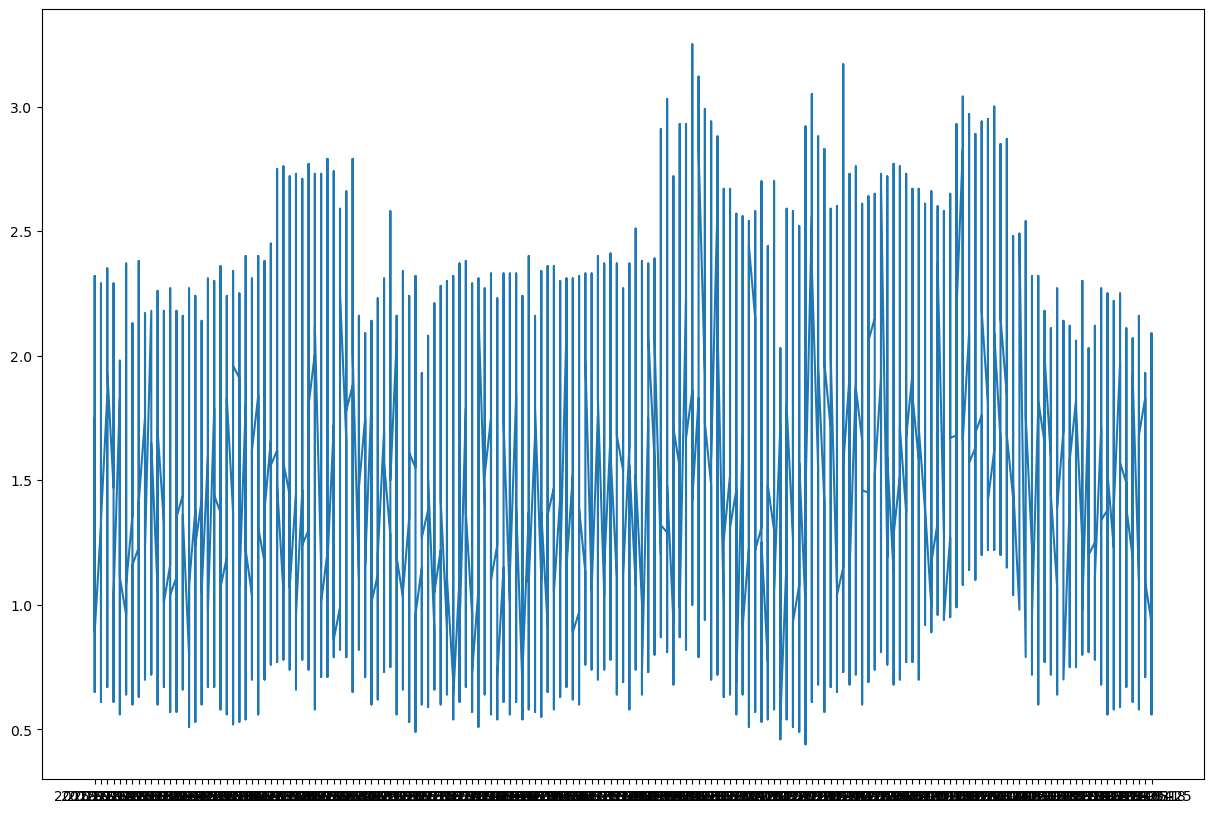

In [15]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'],df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

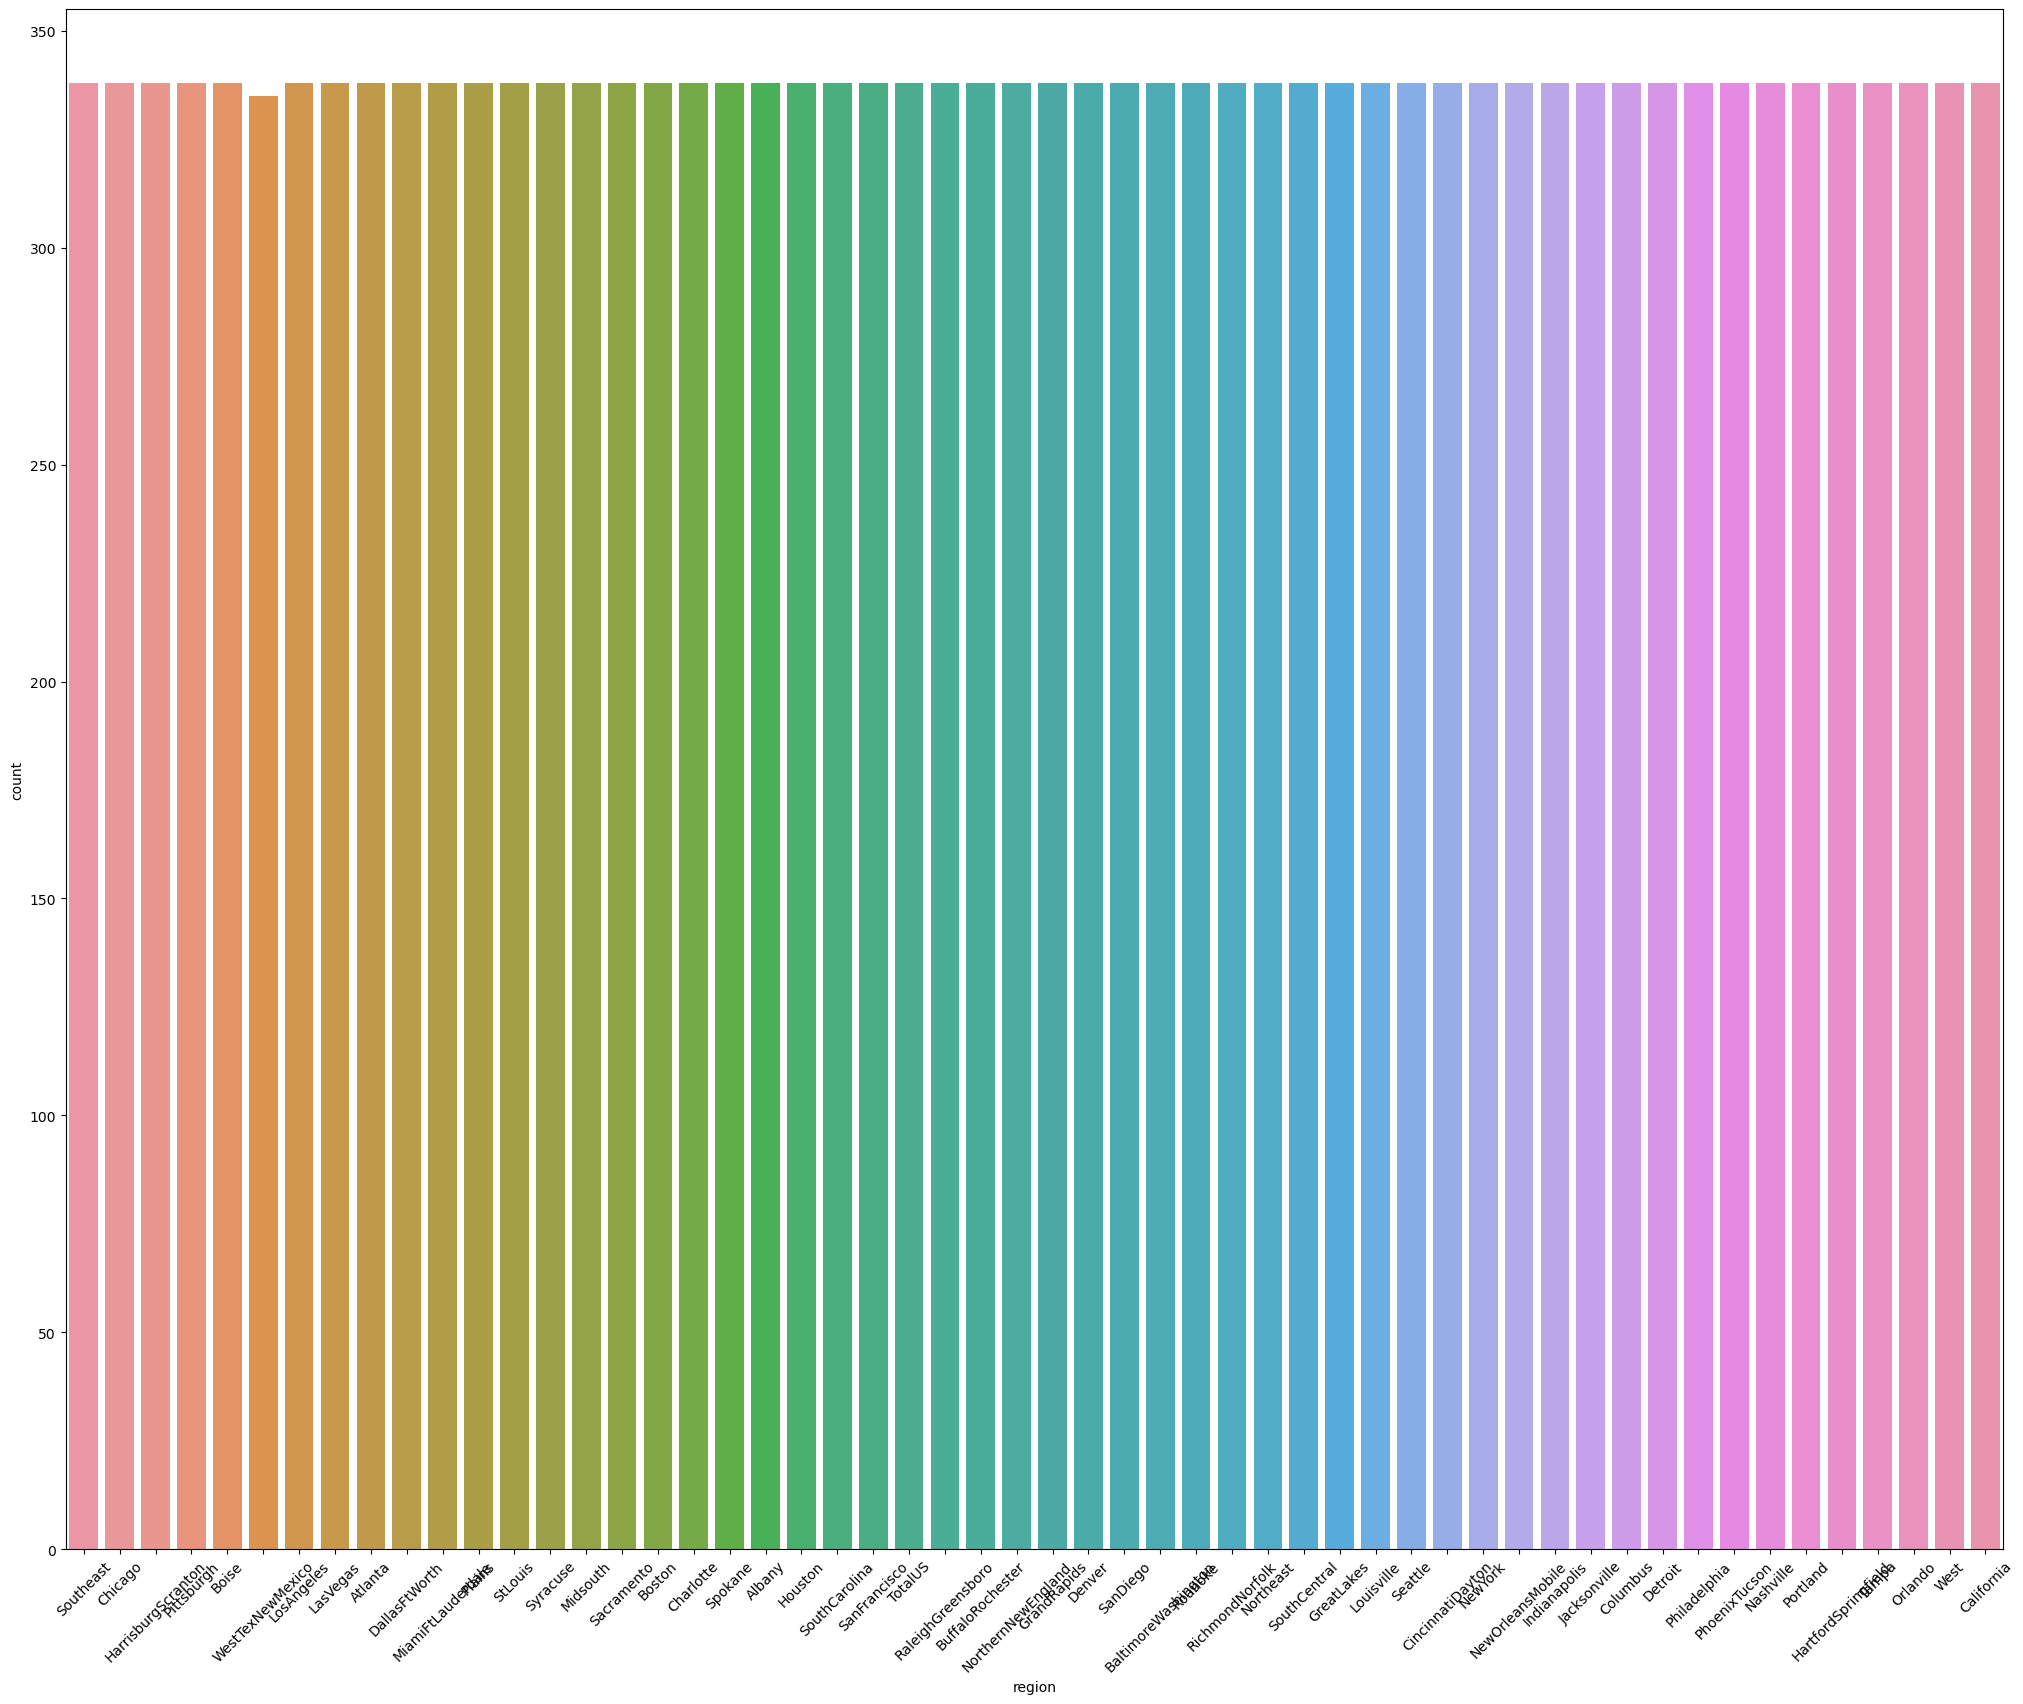

In [19]:
plt.figure(figsize=(25,20))
sns.countplot(data=df,x='region')
plt.xticks(rotation=45)

<Axes: xlabel='year', ylabel='count'>

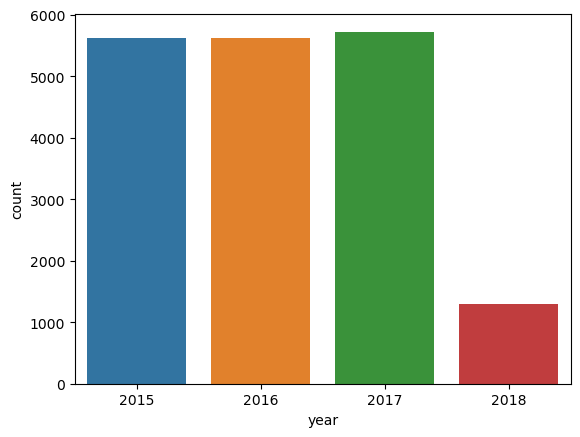

In [20]:
sns.countplot(x='year',data=df)

In [21]:
df_prophet=df[['Date','AveragePrice']]

In [22]:
df_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [31]:
df_prophet.index=pd.to_datetime(df_prophet['Date'])
df_prophet.resample('m').size()

Date
2015-01-31    432
2015-02-28    432
2015-03-31    540
2015-04-30    432
2015-05-31    540
2015-06-30    432
2015-07-31    432
2015-08-31    540
2015-09-30    432
2015-10-31    432
2015-11-30    540
2015-12-31    431
2016-01-31    540
2016-02-29    432
2016-03-31    432
2016-04-30    432
2016-05-31    540
2016-06-30    432
2016-07-31    540
2016-08-31    432
2016-09-30    432
2016-10-31    540
2016-11-30    432
2016-12-31    432
2017-01-31    540
2017-02-28    432
2017-03-31    432
2017-04-30    540
2017-05-31    432
2017-06-30    430
2017-07-31    540
2017-08-31    432
2017-09-30    432
2017-10-31    540
2017-11-30    432
2017-12-31    540
2018-01-31    432
2018-02-28    432
2018-03-31    432
Freq: M, dtype: int64

Text(0.5, 1.0, 'Price of Avacadoes Monthly')

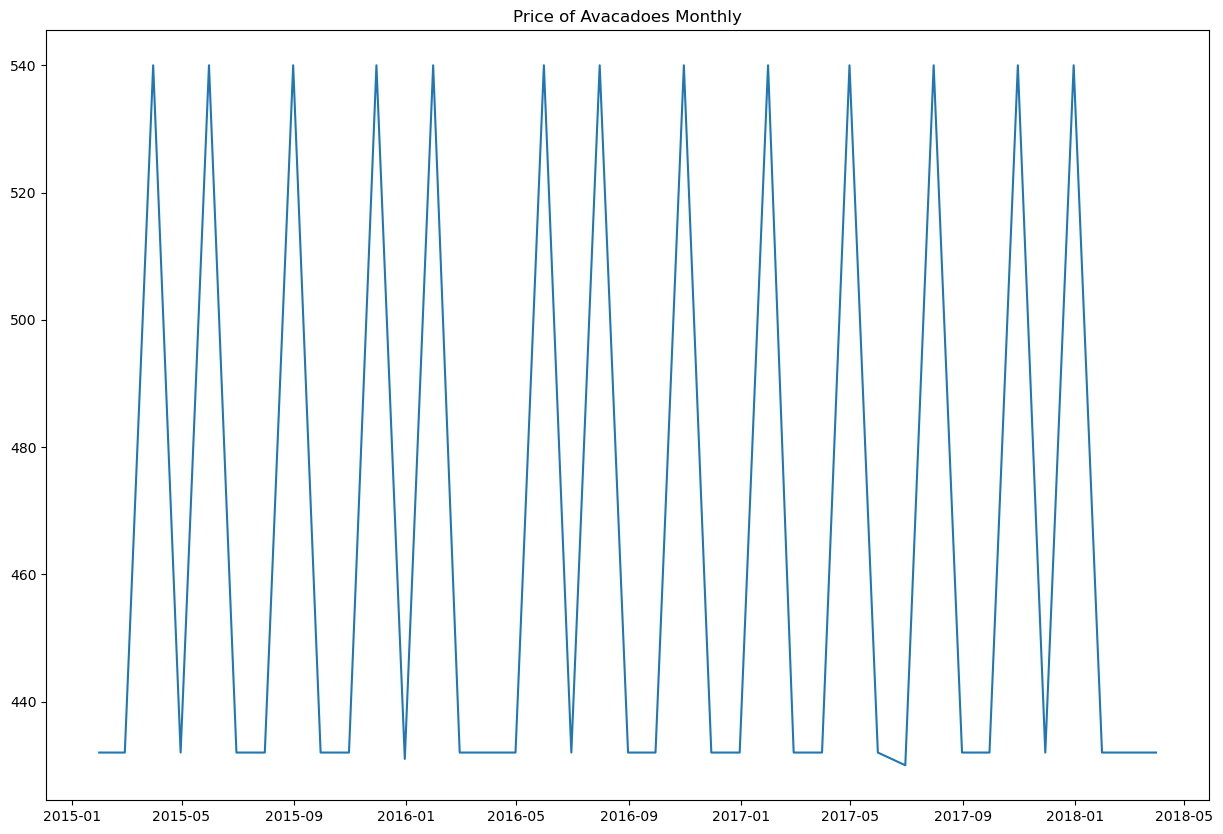

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df_prophet.resample('m').size())
plt.title("Price of Avacadoes Monthly")

Text(0.5, 1.0, 'Price of Avacadoes Yearly')

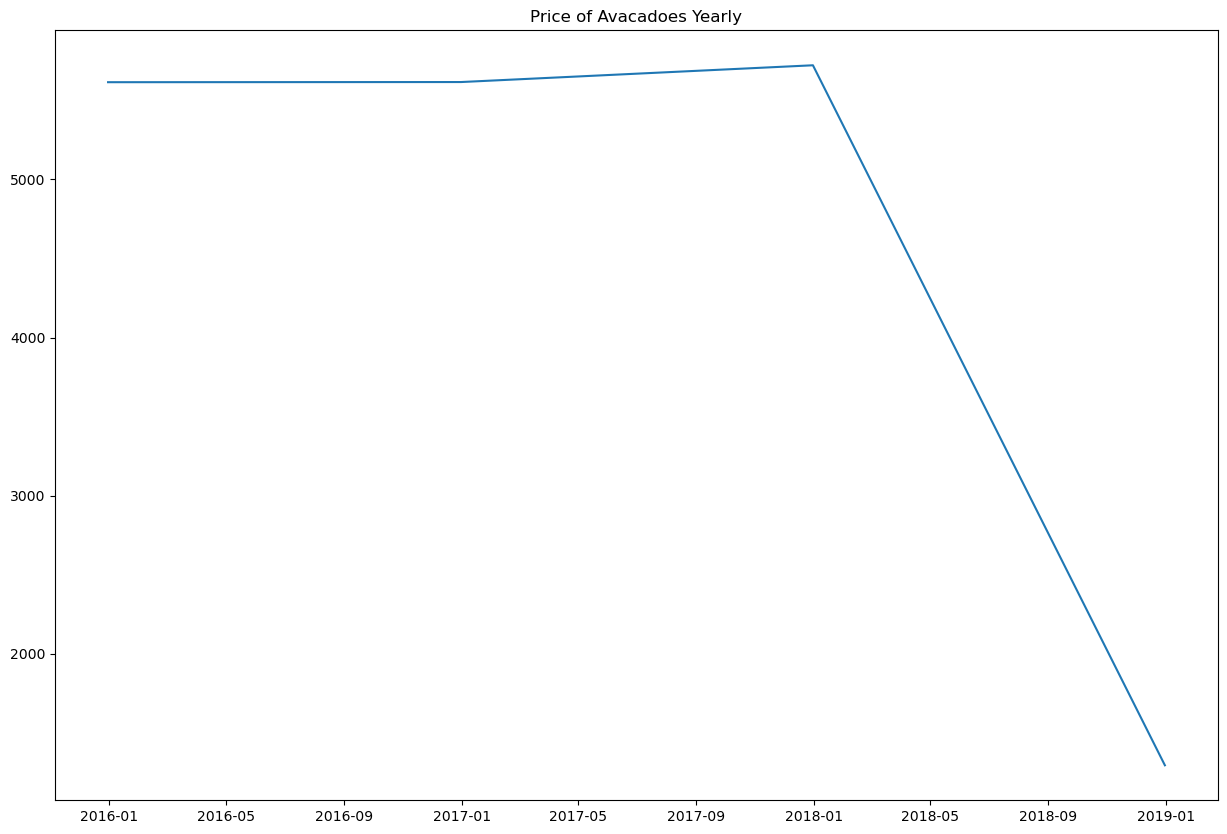

In [35]:
plt.figure(figsize=(15,10))
plt.plot(df_prophet.resample('Y').size())
plt.title("Price of Avacadoes Yearly")

Text(0.5, 1.0, 'Price of Avacadoes Quaterly')

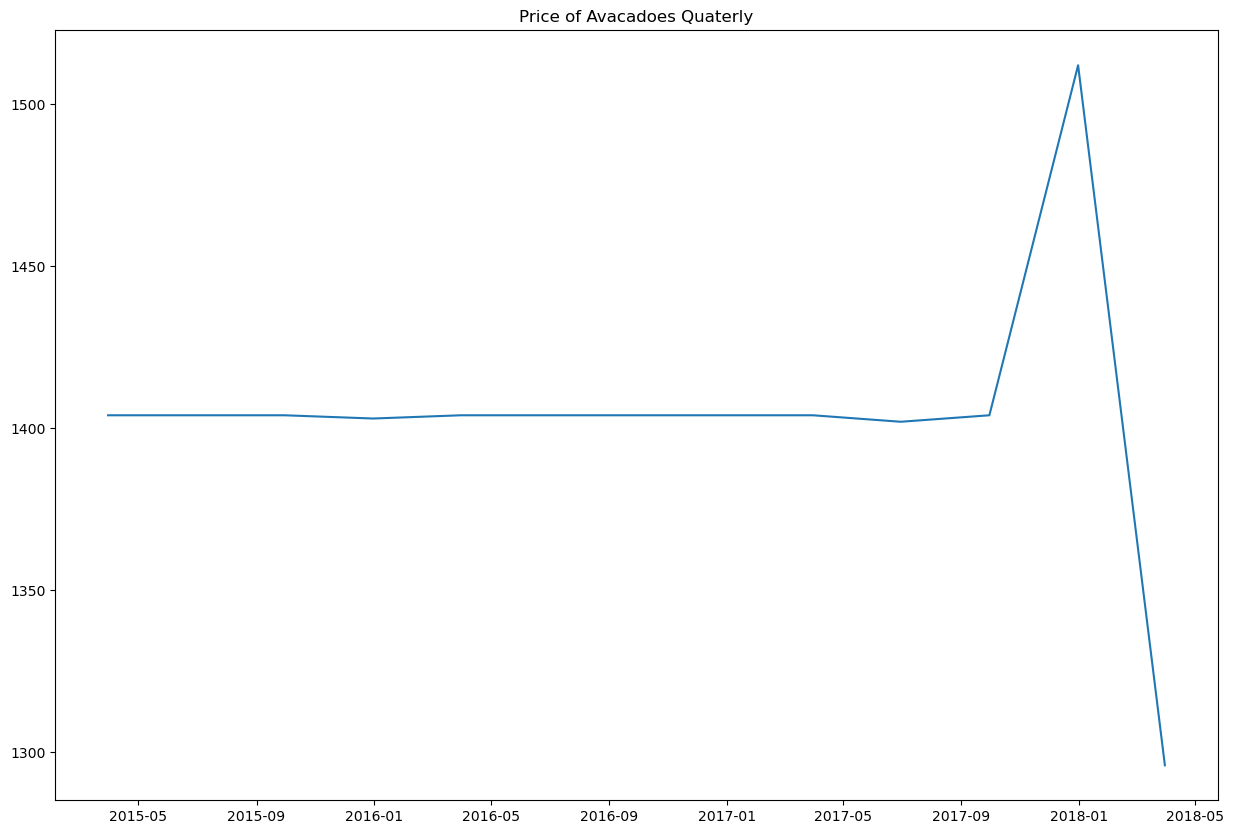

In [36]:
plt.figure(figsize=(15,10))
plt.plot(df_prophet.resample('Q').size())
plt.title("Price of Avacadoes Quaterly")

In [39]:
#df_prophet.reset_index(inplace=True)
df_prophet

,Date,AveragePrice
Date,,
2015-01-04,2015-01-04,1.75
2015-01-04,2015-01-04,1.49
2015-01-04,2015-01-04,1.68
2015-01-04,2015-01-04,1.52
2015-01-04,2015-01-04,1.64
...,...,...
2018-03-25,2018-03-25,1.36
2018-03-25,2018-03-25,0.70
2018-03-25,2018-03-25,1.42


## STEP 3 Make Predictions

In [40]:
df_final=df_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})

In [41]:
df_final

,ds,y
Date,,
2015-01-04,2015-01-04,1.75
2015-01-04,2015-01-04,1.49
2015-01-04,2015-01-04,1.68
2015-01-04,2015-01-04,1.52
2015-01-04,2015-01-04,1.64
...,...,...
2018-03-25,2018-03-25,1.36
2018-03-25,2018-03-25,0.70
2018-03-25,2018-03-25,1.42


In [42]:
model=Prophet()

In [43]:
model.fit(df_final)

12:49:00 - cmdstanpy - INFO - Chain [1] start processing
12:49:02 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
#FORECASTING

future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497220,0.873606,1.845004,1.497220,1.497220,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,0.0,0.0,0.0,1.384464
1,2015-01-11,1.492220,0.910635,1.872582,1.492220,1.492220,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,0.0,0.0,0.0,1.387937
2,2015-01-18,1.487221,0.900810,1.843696,1.487221,1.487221,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,0.0,0.0,0.0,1.383254
3,2015-01-25,1.482221,0.884412,1.854304,1.482221,1.482221,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,0.0,0.0,0.0,1.359263
4,2015-02-01,1.477222,0.852862,1.799749,1.477222,1.477222,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,0.0,0.0,0.0,1.325850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.159300,0.565257,1.592078,0.963062,1.349197,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,0.0,0.0,0.0,1.073099
530,2019-03-22,1.158564,0.570550,1.614152,0.961899,1.349035,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,0.0,0.0,0.0,1.074019
531,2019-03-23,1.157828,0.576641,1.616762,0.960724,1.349014,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,0.0,0.0,0.0,1.075212
532,2019-03-24,1.157092,0.548739,1.595369,0.959550,1.349033,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,0.0,0.0,0.0,1.076657


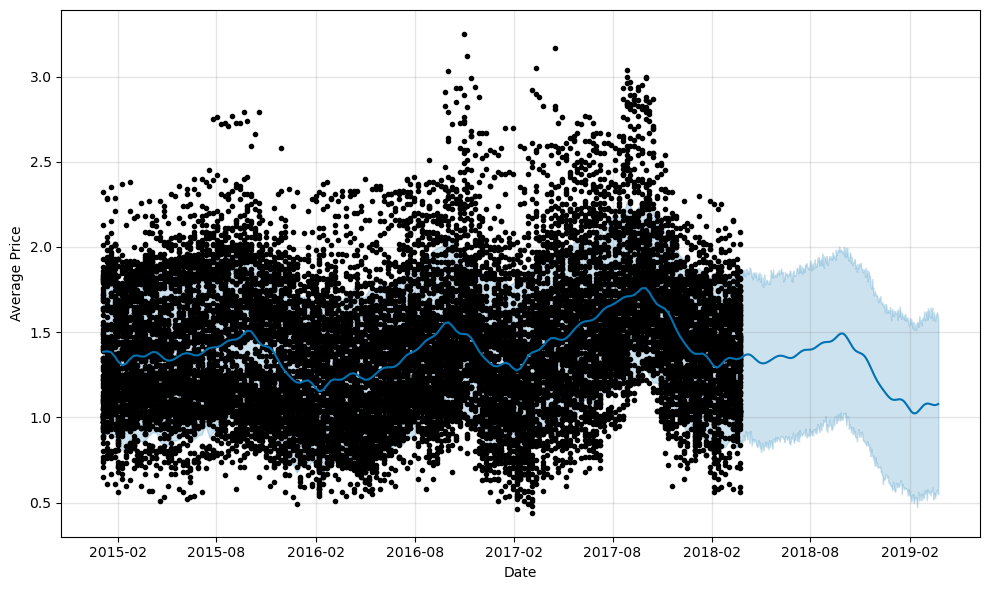

In [48]:
figure=model.plot(forecast,xlabel='Date',ylabel='Average Price')

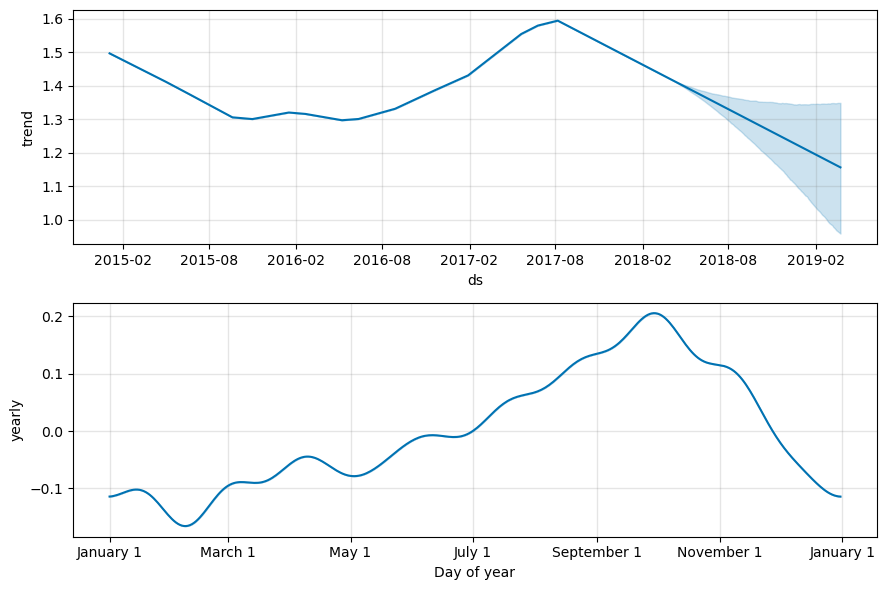

In [49]:
figure=model.plot_components(forecast)

## PART 2


In [50]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [53]:
df_sample=df[df['region']=='West']

In [54]:
df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [55]:
df_sample=df_sample.sort_values('Date')

In [56]:
df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


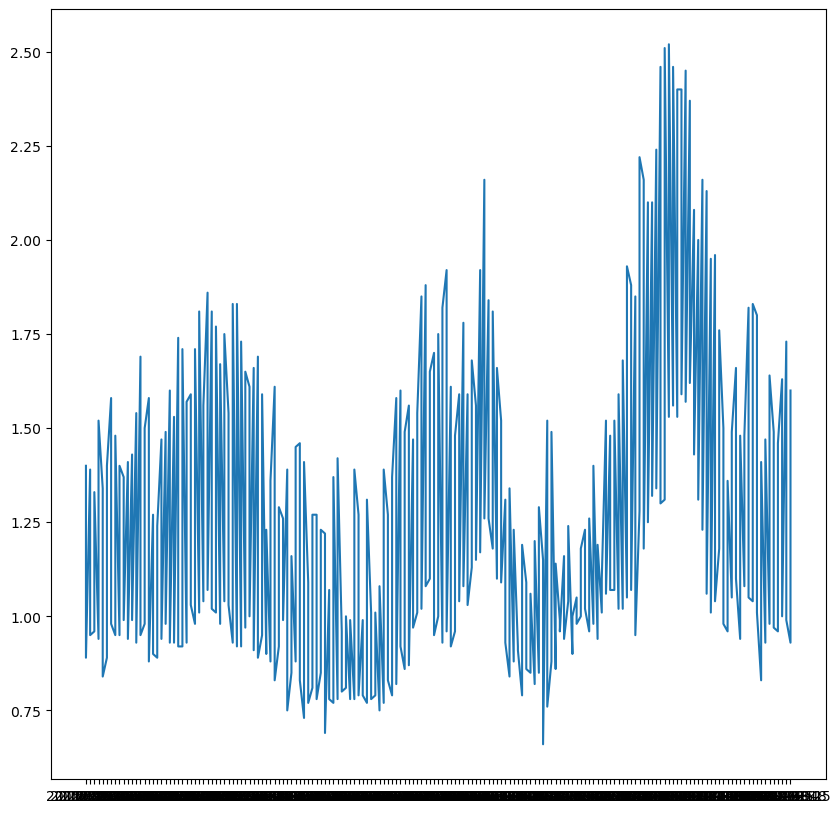

In [58]:
plt.figure(figsize=(10,10))
plt.plot(df_sample['Date'],df_sample['AveragePrice'])

In [59]:
df_sample_prophet=df_sample[['Date','AveragePrice']]

In [61]:
df_sample_prophet.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_38756\2148488636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_prophet.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)


In [62]:
df_sample_prophet

,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96
...,...,...
9104,2018-03-11,1.00
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [64]:
model_1=Prophet()
model_1.fit(df_sample_prophet)

13:32:13 - cmdstanpy - INFO - Chain [1] start processing
13:32:13 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future_1=model.make_future_dataframe(periods=365)
forecast_1=model.predict(future)

In [67]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497220,0.876843,1.887108,1.497220,1.497220,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,0.0,0.0,0.0,1.384464
1,2015-01-11,1.492220,0.889101,1.859045,1.492220,1.492220,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,0.0,0.0,0.0,1.387937
2,2015-01-18,1.487221,0.908964,1.847776,1.487221,1.487221,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,0.0,0.0,0.0,1.383254
3,2015-01-25,1.482221,0.868944,1.872202,1.482221,1.482221,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,0.0,0.0,0.0,1.359263
4,2015-02-01,1.477222,0.811930,1.829677,1.477222,1.477222,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,0.0,0.0,0.0,1.325850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.159300,0.572094,1.610325,0.973493,1.351625,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,0.0,0.0,0.0,1.073099
530,2019-03-22,1.158564,0.564486,1.574100,0.972114,1.352067,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,0.0,0.0,0.0,1.074019
531,2019-03-23,1.157828,0.541313,1.580484,0.970781,1.352882,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,0.0,0.0,0.0,1.075212
532,2019-03-24,1.157092,0.530311,1.626809,0.969448,1.353697,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,0.0,0.0,0.0,1.076657


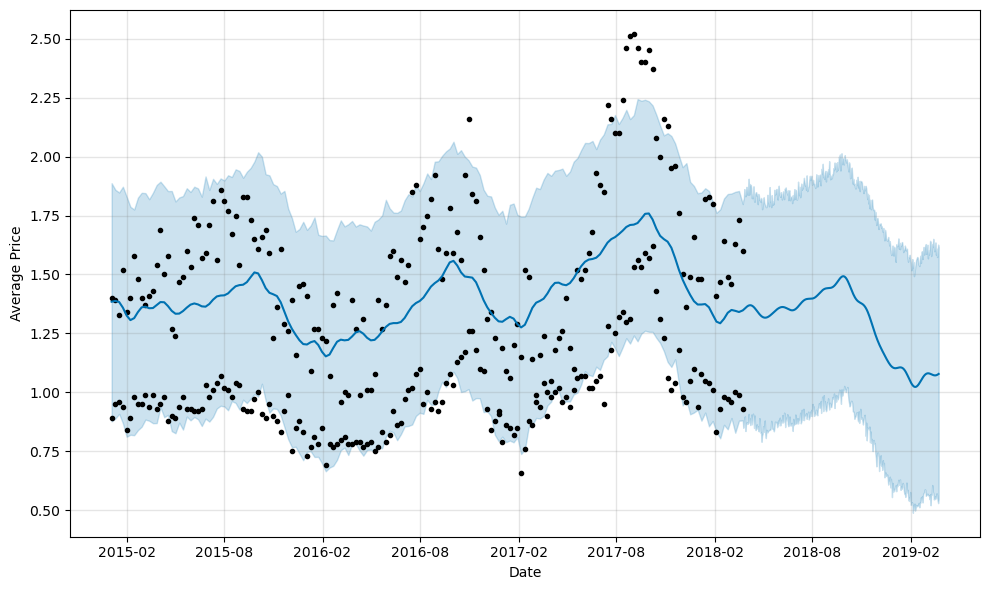

In [71]:
figure=model_1.plot(forecast_1,xlabel='Date',ylabel='Average Price')

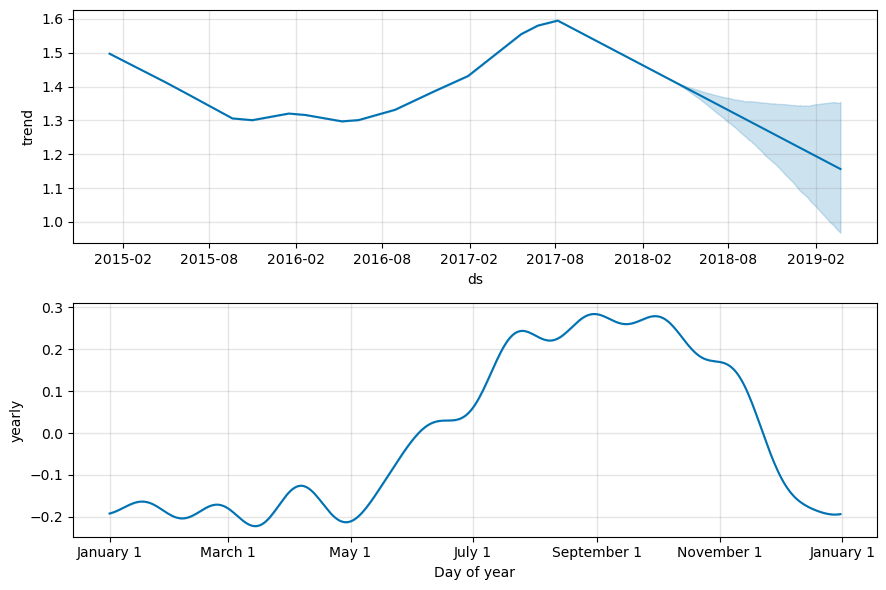

In [72]:
figure=model_1.plot_components(forecast_1)

## Thats it!